- 1. Load Data
- 2. Get to know Data
- 3. Clean Data
    - 3.1 remove weird characters
    - 3.2 stopwords
    - 3.3 popularity based prefiltering
    - 3.4 lemmatization / stemming
- 4. Tokenize Data
- 5. Save preprocessed data

# ---------------------------------------------------------------------- #
# 1. Load Data

Raw data is gathered from [newsapi](https://newsapi.org/).

### Newsapi:

In [ ]:
from IPython.display import IFrame    
display(IFrame("https://newsapi.org/", width=1200, height=350))

We use [pandas](https://pandas.pydata.org/) to generally handle the data.

### Pandas:

In [ ]:
display(IFrame("https://pandas.pydata.org/", width=1200, height=350))

In [3]:
import pandas as pd
pd.set_option("max.colwidth", 400)
df = pd.read_csv('data/sample_5000.csv', index_col="Unnamed: 0")

# 2. Get to know Data

In [4]:
print("Shape:", df.shape)
df.head()

Shape: (5000, 4)


,Index,date,text,title
5038,621031,2017-10-26 15:00:54,"eBay launches visual search tools that let you shop using photos from your phone or web0eBay today is launching two new visual search tools that will allow online shoppers to use photos they snap, have saved on their phone, or even those they find while browsing the web or other social networking sites, in order to find matching products from eBay’s catalog. The tools, Image Search and Find it...",eBay launches visual search tools that let you shop using photos from your phone or web
5039,621032,2017-10-26 00:00:00,"Monsanto Attacks Scientists After Studies Show Trouble For Its New Weedkiller : The SaltScientists are accusing the seed-and-pesticide giant Monsanto of denying the risks of its latest weedkilling technology. Monsanto has responded by attacking some of its scientific critics.Monsanto Attacks Scientists After Studies Show Trouble For Its New WeedkillerBob Scott, an expert on weeds with the Univ...",Monsanto Attacks Scientists After Studies Show Trouble For Its New Weedkiller
5040,621035,2017-10-26 14:41:12,"Hard Drive Stats for Q3 2017In Q3 2017, Backblaze introduced both 10 TB and 12 TB hard drives into our data centers, we continued to retire 3 TB and 4 TB hard drives to increase storage density, and we added over 59 petabytes of data storage to bring our total storage capacity to 400 petabytes.In this update, we’ll review the Q3 2017 and lifetime hard drive failure rates for all our drive mode...",2017 Hard Drive Reliability by Drive Size and Brand
5041,621036,2017-10-26 15:27:11,"This is part 1 of the “How Unreal Renders a Frame” series, you can access part 2 and part 3 as well.I was looking around the Unreal source the other day and inspired by some excellent breakdowns of how popular games render a frame, I thought to try something similar with it as well, to study how it renders a frame (with the default settings/scene setup).Since we have access to the source code,...",How Unreal Renders a Frame
5042,621423,2017-10-26 16:02:00,"Boeing builds towards its first space taxi testWhen NASA first named Boeing and SpaceX as recipients of the Commercial Crew Program, they originally aimed to end the agency's dependence on Russia by 2017. But developing space technologies is hard, and both companies had to push their first crewed test flights to late 2018 -- some reports even say they'll be delayed until 2019. While it's still...",Boeing builds towards its first space taxi test


In [5]:
df.sample(2)

,Index,date,text,title
8944,3215186,2018-01-24 14:41:30,"In the latest indication of Apple’s growing ambitions in the digital health market, the tech giant on Wednesday unveiled a new feature that would allow users to automatically download and see parts of their medical records on their iPhones.The feature is to become part of Apple’s popular Health app. It will enable users to transfer clinical data — like cholesterol levels and lists of medicatio...","Apple, in Sign of Health Ambitions, Adds Medical Records Feature for iPhone"
5478,699331,2017-11-11 13:00:00,"The Morning After: Weekend EditionThe weekend has landed. If you're already holiday shopping, you're a smarter person than I. Engadget can help, as we kicked off our gift guide this week. We've also showcased some of the experiences that will be premiering at the Engadget Experience, which kicks off next Tuesday. The FBI was struggling to unlock criminals' phones again, and we all learn that a...",The Morning After: Weekend Edition


### Datatypes

In [6]:
display(IFrame("https://www.tutorialsteacher.com/python/python-data-types", width=1200, height=150))

In [7]:
df.dtypes

Index     int64
date     object
text     object
title    object
dtype: object

### Data distribution

First cast the date column, which is currently of object type, to datetime type.

In [8]:
df["date"] = pd.to_datetime(df.date)
df.dtypes

Index             int64
date     datetime64[ns]
text             object
title            object
dtype: object

Now cast the datetime object to the end/start of a period, for example end of week.

In [9]:
df["week"] = df.date.dt.to_period("W").dt.to_timestamp('W')
print(df.dtypes)
df.head(2)

Index             int64
date     datetime64[ns]
text             object
title            object
week     datetime64[ns]
dtype: object


,Index,date,text,title,week
5038,621031,2017-10-26 15:00:54,"eBay launches visual search tools that let you shop using photos from your phone or web0eBay today is launching two new visual search tools that will allow online shoppers to use photos they snap, have saved on their phone, or even those they find while browsing the web or other social networking sites, in order to find matching products from eBay’s catalog. The tools, Image Search and Find it...",eBay launches visual search tools that let you shop using photos from your phone or web,2017-10-29
5039,621032,2017-10-26 00:00:00,"Monsanto Attacks Scientists After Studies Show Trouble For Its New Weedkiller : The SaltScientists are accusing the seed-and-pesticide giant Monsanto of denying the risks of its latest weedkilling technology. Monsanto has responded by attacking some of its scientific critics.Monsanto Attacks Scientists After Studies Show Trouble For Its New WeedkillerBob Scott, an expert on weeds with the Univ...",Monsanto Attacks Scientists After Studies Show Trouble For Its New Weedkiller,2017-10-29


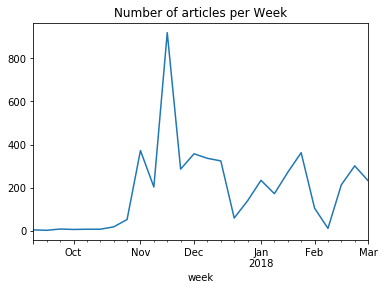

In [44]:
df.groupby("week").title.count().plot(title="Number of articles per Week")

##### Number of words per article

In [11]:
df.text.str.split().apply(len).describe()

count     5000.000000
mean       908.503800
std       1744.611774
min         29.000000
25%        298.000000
50%        568.000000
75%       1086.000000
max      94980.000000
Name: text, dtype: float64

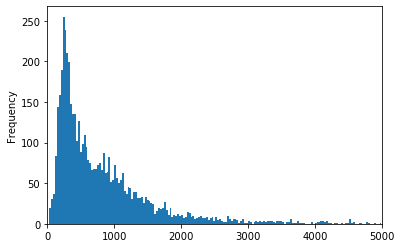

In [12]:
df.text.str.split().apply(len).plot(kind="hist", bins=3330, xlim=(0,5000))

## Clean Data

In [13]:
import re

# get rid of everything except letters, space and .!?
clean = lambda x : re.sub('[^a-z .!?]', "", str(x).lower())

# clean text
%time df["clean_text"] = df.text.apply(clean) 
df.head()

Wall time: 444 ms


,Index,date,text,title,week,clean_text
5038,621031,2017-10-26 15:00:54,"eBay launches visual search tools that let you shop using photos from your phone or web0eBay today is launching two new visual search tools that will allow online shoppers to use photos they snap, have saved on their phone, or even those they find while browsing the web or other social networking sites, in order to find matching products from eBay’s catalog. The tools, Image Search and Find it...",eBay launches visual search tools that let you shop using photos from your phone or web,2017-10-29,ebay launches visual search tools that let you shop using photos from your phone or webebay today is launching two new visual search tools that will allow online shoppers to use photos they snap have saved on their phone or even those they find while browsing the web or other social networking sites in order to find matching products from ebays catalog. the tools image search and find it on eb...
5039,621032,2017-10-26 00:00:00,"Monsanto Attacks Scientists After Studies Show Trouble For Its New Weedkiller : The SaltScientists are accusing the seed-and-pesticide giant Monsanto of denying the risks of its latest weedkilling technology. Monsanto has responded by attacking some of its scientific critics.Monsanto Attacks Scientists After Studies Show Trouble For Its New WeedkillerBob Scott, an expert on weeds with the Univ...",Monsanto Attacks Scientists After Studies Show Trouble For Its New Weedkiller,2017-10-29,monsanto attacks scientists after studies show trouble for its new weedkiller the saltscientists are accusing the seedandpesticide giant monsanto of denying the risks of its latest weedkilling technology. monsanto has responded by attacking some of its scientific critics.monsanto attacks scientists after studies show trouble for its new weedkillerbob scott an expert on weeds with the universi...
5040,621035,2017-10-26 14:41:12,"Hard Drive Stats for Q3 2017In Q3 2017, Backblaze introduced both 10 TB and 12 TB hard drives into our data centers, we continued to retire 3 TB and 4 TB hard drives to increase storage density, and we added over 59 petabytes of data storage to bring our total storage capacity to 400 petabytes.In this update, we’ll review the Q3 2017 and lifetime hard drive failure rates for all our drive mode...",2017 Hard Drive Reliability by Drive Size and Brand,2017-10-29,hard drive stats for q in q backblaze introduced both tb and tb hard drives into our data centers we continued to retire tb and tb hard drives to increase storage density and we added over petabytes of data storage to bring our total storage capacity to petabytes.in this update well review the q and lifetime hard drive failure rates for all our drive models in use at the end of q. well...
5041,621036,2017-10-26 15:27:11,"This is part 1 of the “How Unreal Renders a Frame” series, you can access part 2 and part 3 as well.I was looking around the Unreal source the other day and inspired by some excellent breakdowns of how popular games render a frame, I thought to try something similar with it as well, to study how it renders a frame (with the default settings/scene setup).Since we have access to the source code,...",How Unreal Renders a Frame,2017-10-29,this is part of the how unreal renders a frame series you can access part and part as well.i was looking around the unreal source the other day and inspired by some excellent breakdowns of how popular games render a frame i thought to try something similar with it as well to study how it renders a frame with the default settingsscene setup.since we have access to the source code it is possi...
5042,621423,2017-10-26 16:02:00,"Boeing builds towards its first space taxi testWhen NASA first named Boeing and SpaceX as recipients of the Commercial Crew Program, they originally aimed to end the agency's dependence on Russia by 2017. But developing space technologies is hard, and both companies had to push their first crewed test flights to l

## Lemmatizitation / Stemming

- Stemming -> Heuristic (fast)
- Lemmatization -> Based on dictionary (not so fast)

<img src="https://timkuhn.github.io/TextMining/images/lemma.png" width="300">

In [14]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

## Popularity based prefiltering

Idea: Very frequent and very infrequent words are either too common or too rare to provide insights.

> removing corpus-specific stop words


#### Motivation:

<img src="https://finnaarupnielsen.files.wordpress.com/2013/10/brownzipf.png" width=350>

#### Word frequency for our corpus:

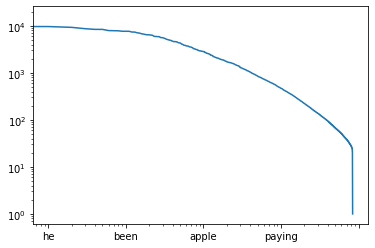

In [45]:
import matplotlib.pyplot as plt
pd.Series([j for k in df["clean_text"].str.split().values for j in k]).value_counts().plot(logy=True, logx=True)

In [31]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

sklearn.__version__: 0.22.1


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
stopwords=['of', "the", "to", "a"]

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(min_df=0.005, max_df=0.6, tokenizer=LemmaTokenizer()) # lemma tokenizer
cv = CountVectorizer(min_df=0.005, max_df=0.6,
                     stop_words=stopwords) # no lemmatization

%time cv.fit(df["clean_text"].values)
len(cv.vocabulary_)

Wall time: 2.97 s


8372

#### Get the vocabulary from the cv object and filter all words not in the vocab

In [37]:
vocab = frozenset(cv.vocabulary_)
%time df["clean_text"] = df["clean_text"].str.split().apply(lambda x : [y for y in x if y in vocab]).apply(" ".join)
df.head()

Wall time: 493 ms


,Index,date,text,title,week,clean_text
5038,621031,2017-10-26 15:00:54,"eBay launches visual search tools that let you shop using photos from your phone or web0eBay today is launching two new visual search tools that will allow online shoppers to use photos they snap, have saved on their phone, or even those they find while browsing the web or other social networking sites, in order to find matching products from eBay’s catalog. The tools, Image Search and Find it...",eBay launches visual search tools that let you shop using photos from your phone or web,2017-10-29,ebay launches visual search tools let shop using photos your phone today launching two visual search tools allow online shoppers use photos snap saved phone even those find while browsing web social networking sites order find matching products tools image search find ebay leverage advancements computer vision deep learning including use neural networks company first tool image search allows m...
5039,621032,2017-10-26 00:00:00,"Monsanto Attacks Scientists After Studies Show Trouble For Its New Weedkiller : The SaltScientists are accusing the seed-and-pesticide giant Monsanto of denying the risks of its latest weedkilling technology. Monsanto has responded by attacking some of its scientific critics.Monsanto Attacks Scientists After Studies Show Trouble For Its New WeedkillerBob Scott, an expert on weeds with the Univ...",Monsanto Attacks Scientists After Studies Show Trouble For Its New Weedkiller,2017-10-29,attacks scientists after studies show trouble accusing giant denying risks latest responded attacking some scientific attacks scientists after studies show trouble scott expert university research plot where were exposed dan charles npr hide charles scott expert university research plot where were exposed charles normal year kevin professor weed science university missouri would spent his summ...
5040,621035,2017-10-26 14:41:12,"Hard Drive Stats for Q3 2017In Q3 2017, Backblaze introduced both 10 TB and 12 TB hard drives into our data centers, we continued to retire 3 TB and 4 TB hard drives to increase storage density, and we added over 59 petabytes of data storage to bring our total storage capacity to 400 petabytes.In this update, we’ll review the Q3 2017 and lifetime hard drive failure rates for all our drive mode...",2017 Hard Drive Reliability by Drive Size and Brand,2017-10-29,hard drive stats introduced both tb tb hard drives into our data centers continued tb tb hard drives increase storage density added over data storage bring our total storage capacity update well review lifetime hard drive failure rates our drive models use end well check our tb enterprise versus consumer hard drive comparison look storage density changes our data centers over past couple along...
5041,621036,2017-10-26 15:27:11,"This is part 1 of the “How Unreal Renders a Frame” series, you can access part 2 and part 3 as well.I was looking around the Unreal source the other day and inspired by some excellent breakdowns of how popular games render a frame, I thought to try something similar with it as well, to study how it renders a frame (with the default settings/scene setup).Since we have access to the source code,...",How Unreal Renders a Frame,2017-10-29,part how renders frame series access part part looking around source day inspired some excellent how popular games render frame thought try something similar well study how renders frame default access source code possible study source see what does although quite beast rendering paths depend lot context clean lowlevel api call list easier follow looking into code fill any missing put together...
5042,621423,2017-10-26 16:02:00,"Boeing builds towards its first space taxi testWhen NASA first named Boeing and SpaceX as recipients of the Commercial Crew Program, they originally aimed to end the agency's dependence on Russia by 2017. But developing space technologies is hard, and both companies had to push their first crewed test 

# Save Data for later

In [46]:
df.to_csv("data/sample_5000_clean.csv")

# Summary

- 1. Loaded Data
- 2. Got to know Data
    - 2.1 Distributions
    - 2.2 frequent words and stuff
- 3. Clean Data
    - 3.1 remove weird characters
    - 3.2 stopwords
    - 3.3 popularity based prefiltering
    - 3.4 lemmatization / stemming
- 4. Tokenize Data
- 5. Save preprocessed data

In [47]:
?cv

Type:        CountVectorizer
String form:
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
           dtype=<clas <...>               token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None,
           vocabulary=None)
File:        c:\program files (x86)\anaconda3\envs\py37\lib\site-packages\sklearn\feature_extraction\text.py
Docstring:  
Convert a collection of text documents to a matrix of token counts

This implementation produces a sparse representation of the counts using
scipy.sparse.csr_matrix.

If you do not provide an a-priori dictionary and you do not use an analyzer
that does some kind of feature selection then the number of features will
be equal to the vocabulary size found by analyzing the data.

Read more in the :ref:`User Guide <text_feature_extraction>`.

Parameters
----------
input : string {'filename', 'file', 'content'}
    If 'filename', the sequence passed as an argument to fit is
    expected to be a list of filenames that need reading to fetch
   